# Eindimensionale Bewegung

Vielleicht haben Sie im vorangehenden Beispiel einer spiralförmigen Bewegung im Raum ein wichtiges Prinzip bereits verstanden. Wenn Sie die Bewegung entlang einer einzigen Achse beschreiben können, müssen Sie den Prozess im Grunde nur noch zwei weitere Male für die anderen Achsen repetieren und Sie sind auch in der Lage die allgemeine Bewegung im Raum zu beschreiben. Wir fokussieren uns deshalb hier auf die eindimensionale Bewegung.

Oft stiessen wir auch an die Grenzen unserer Mathematikkenntnisse. Deshalb betrachten wir hier nur besonders einfach zu beschreibender Bewegungen.

## Inhalt
* [Die gleichförmige Bewegung](#1)
    * [Reduktion auf eine Dimension](#1.1)
    * [Das Verhältnis von Geschwindigkeit und Wegkoordinate](#1.2)
        * [Von mittlerer zu momentaner Geschwindigkeit](#1.2.1)
        * [Graphische Betrachtung](#1.2.2)
    * [Das Verhältnis von Geschwindigkeit und Beschleunigung](#1.3)
        

Bevor wir starten, müssen wir - wie immer - noch einige wichtige Bibliotheken laden.

In [1]:
import numpy as np # efficient handling of arrays (special mathematical lists)
import pandas as pd # handling of lists (like "Microsoft Excel" - but more powerful)
import matplotlib.pyplot as plt # plotting graphs
from matplotlib.patches import Rectangle # plot rectangle
import matplotlib.animation as animation # animated plots
from IPython.display import HTML,display # display animations in video form
import ipywidgets as widgets
from ipywidgets import interact

## Die gleichförmige Bewegung <a class="anchor" id="1"></a>

Wir beginnen unsere Untersuchung der eindimensionalen Bewegung mit einem besonders einfachen Fall: der *gleichförmigen Bewegung*.

Eine Bewegung heisst genau dann gleichförmig, wenn sich während ihrer ganzen Dauer die Geschwindigkeit $\vec{v}$ nicht ändert:

<a class="anchor" id="one"></a>
\begin{equation}
\vec{v} = \vec{konst.}
\tag{1}
\end{equation}

Dies bedeutet, dass alle Achsengeschwindigkeiten $v_x$, $v_y$ und $v_z$ Konstante sind. Der Pfeil, der die Geschwindigkeit im Raum angibt, verändert sich nicht.

<a class="anchor" id="two"></a>
\begin{equation}
\vec{v}=\begin{pmatrix}
v_x \\
v_y \\
v_z
\end{pmatrix}
\tag{2}
\end{equation}

### Reduktion auf eine Dimension <a class="anchor" id="1.1"></a>

Die Bahnkurve einer solchen Bewegung ist mathematisch ausgedrückt eine Gerade, auf der sich der beschriebene Massepunkt gleichförmig bewegt. Diese Gerade kann grundsätzlich beliebig im Raum liegen.

In [2]:
# define arbirary uniform linear motion
t_min = 0
t_max = 1
dt = 1e-2
t = np.arange(t_min,t_max,dt)
vvec = np.array([1,4,8])
rvec_0 = np.array([1,-2,3])

f_rvec = lambda t: np.multiply(t[np.newaxis],vvec[:,np.newaxis])+rvec_0[:,np.newaxis]

# compute time dependent position data as list
x,y,z = f_rvec(t)

# 
fig = plt.figure(figsize=(7.5,5))

# plot trajectory
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(*f_rvec(t),color="gray",label="Bahnkurve")

#set current index
idx = 0
# plot P(x(t'),y(t'),z(t'))
pt_=ax.scatter(*f_rvec(np.array([t[idx]])),color="black",label="$P(x(t'),y(t'),z(t'))$")
# plot corresponding position vector
rvec_=ax.quiver(*np.zeros(3),*f_rvec(np.array([t[idx]])),color=['r'],label=r"$\vec{r}(t')$")
# plot corresponding velocity vector
vvec_=ax.quiver(*f_rvec(np.array([t[idx]])),*vvec,color=['b'],label=r"$\vec{v}(t')$")
# plot distance travelled
s_=ax.plot(*f_rvec(t[:idx]),color="red",label="s(t')",linestyle="dashed")[0]

# set graph labels
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Gleichförmige Bewegung")
ax.legend(ncol=2)

def animate(i):
    """Update the plot at the ith time step"""
    
    # update position of point
    pt_._offsets3d=(f_rvec(np.array([t[i]])))
    
    # update position vector
    global rvec_
    rvec_.remove()
    rvec_ = ax.quiver(*np.zeros(3),*f_rvec(t[i]),color=['r'],label=r"$\vec{r}(t')$")
    
    # update velocity vector
    global vvec_
    vvec_.remove()
    vvec_ = ax.quiver(*f_rvec(np.array([t[i]])),*vvec,color=['b'],label=r"$\vec{v}(t')$")
    
    # update s(t)
    s_.set_xdata(x[:i])
    s_.set_ydata(y[:i])
    s_.set_3d_properties(z[:i])

# create animation
anim = animation.FuncAnimation(fig, animate, frames=len(t))

# create a video because the animation is otherwise too heavy
video = anim.to_html5_video()
html = HTML(video)
display(html)
plt.close() # avoid plotting a spare static plot

Wir können allerdings unser Koordinatensystem so wählen, dass die gleichförmige Bewegung vollständig entlang einer einzigen Koordinatenachse, etwa $x$ stattfindet. Es handelt sich insofern per Definition um eine eindimensionale Bewegung. Noch häufiger benutzen wir die Wegkoordinate $s$, wie dies fortan in diesem Dokument geschieht. In diesem Fall ist die "imaginäre Schnur", die wir entlang der Bahnkurve ausrollen, bereits gerade und verändert sich nicht mehr, wenn sie gespannt wird.

Nach der Reduktion auf eine einzige Dimension verwenden auch nicht mehr explizit die Vektorschreibweise. Die Geschwindigkeit $v$ und die Beschleunigung $a$ werden entlang der Bahnkurve angegeben, meist ohne Vektorpfeil. Die Grössen $s$, $v$ und $a$ sind nach wie vor gerichtet. Ihre Richtung wird jedoch allein durch ihr Vorzeichen ausgedrückt.

Der Betrag der Geschwindigkeit $v$ entlang der geraden Bahn entspricht der Länge des konstanten dreidimensionalen Geschwindigkeitsvektors $\vec{v}$.

<a class="anchor" id="three"></a>
\begin{equation}
|v|=|\vec{v}|=\sqrt{v_x^2+v_y^2+v_z^2}
\tag{3}
\end{equation}

Bewegt sich die Punktmasse in die positive Richtung entlang der Bahn ist $v$ ebenfalls positiv. Wir erlauben jedoch auch negative Geschwindigkeiten, wenn sich ein Objekt auf der Bahnkurve in die entgegengesetzte Richtung bewegt. Dann ist $v$ negativ. 

Da es sich bei $v_x$, $v_y$ und $v_z$ um Konstanten handelt, muss für gleichförmige Bewegungen auch gelten:

<a class="anchor" id="four"></a>
\begin{equation}
v=konst.
\tag{4}
\end{equation}

Im eindimensionalen Fall ist jede Bewegung mit einer konstanten Geschwindigkeit $v$ eine gleichförmige Bewegung.

In [3]:
v = np.linalg.norm(vvec)
s0 = 1
s = v*t+s0
f_s = lambda t: v*t+s0
s_dot = v*t**2+s0

fig, axes = plt.subplots(nrows=2,figsize=(9,2.5))

for ax in axes:
    ax.yaxis.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_ylim([0,1])
    ax.set_xlim([0,int(v)+s0])
    ax.set_xlabel("s")

# uniform linear motion
pt_,=axes[0].plot([s[0]],[0],color="black",clip_on=False,label="$P(s(t))$",marker="o",ls='')# plot P(x(t),y(t),z(t))
s_,=axes[0].plot(s[0],0,color="red",label="s(t)",clip_on=False,linestyle="dashed")
v_=axes[0].quiver(s[0],0,v,0,color=['b'],label="$v(t)$",clip_on=False)

axes[0].legend(ncol=3,loc=(0.65, 1.04))
axes[0].set_title("gleichförmig",loc="left")

# non-uniform linear motion
pt__,=axes[1].plot([s_dot[0]],[0],color="black",clip_on=False,label="$P(s(t))$",marker="o",ls='')# plot P(x(t),y(t),z(t))
s__,=axes[1].plot(s_dot[0],0,color="red",label="s(t)",clip_on=False,linestyle="dashed")
v__=axes[1].quiver(s_dot[0],0,v,0,color=['b'],label="$v(t)$",clip_on=False)

axes[1].legend(ncol=3,loc=(0.65, 1.04))
axes[1].set_title("unleichförmig",loc="left")

def animate(i):
    """Update the plot at the ith time step"""
    
    # update position of point
    pt_.set_data([s[i]], [0])
    s_.set_data(s[:i],np.zeros(i))
    
    global v_
    v_.remove()
    v_ = axes[0].quiver(s[i],0,v,0,color=['b'],label="$v(t)$",clip_on=False)
    
    pt__.set_data([s_dot[i]], [0])
    s__.set_data(s_dot[:i],np.zeros(i))
    
    global v__
    v__.remove()
    v__ = axes[1].quiver(s_dot[i],0,2*v*t[i]+1e-5,0,color=['b'],label="$v(t)$",clip_on=False)

plt.suptitle("Geradlinige Bewegung")
plt.tight_layout()
# create animation
anim = animation.FuncAnimation(fig, animate, frames=len(t))

# create a video because the animation is otherwise too heavy
video = anim.to_html5_video()
html = HTML(video)
display(html)
plt.close() # avoid plotting a spare static plot

### Das Verhältnis von Geschwindigkeit und Wegkoordinate <a class="anchor" id="1.2"></a>

Die mittlere Geschwindigkeit entlang der Bahnkurve im Zeitintervall, $[t,t+\Delta t]$, ist definiert als:

<a class="anchor" id="five"></a>
\begin{equation}
\bar{v}=\frac{\Delta {s}}{\Delta t}
\tag{5}
\end{equation}

Der im Zeitintervall $[t,t+\Delta t]$ zurückgelegte Weg kann explizit ausgedrückt werden:

<a class="anchor" id="six"></a>
\begin{equation}
\Delta {s}=s(t+\Delta t)-s(t)
\tag{6}
\end{equation}

Multiplizieren wir beide Seiten von [(5)](#five) mit $\Delta t$, erhalten wir:

<a class="anchor" id="seven"></a>
\begin{equation}
\Delta {s}=\bar{v}\Delta t
\tag{7}
\end{equation}

Betrachten wir das Zeitintervall $[0,t]$, sei der Startort $s(0)=s_0$ und nutzen wir [(6)](#six), vereinfacht sich die Formel [(7)](#seven) zu:

<a class="anchor" id="eight"></a>
\begin{equation}
s(t)=\bar{v} t+s_0
\tag{8}
\end{equation}

Falls wir mit der mentalen Schnur dort ansetzten, wo sich der Massepunkt zum Zeitpunkt $t=0$ befindet, ist $s_0=0$ und wir erhalten schlicht:

<a class="anchor" id="nine"></a>
\begin{equation}
s(t)=\bar{v} t + s_0
\tag{9}
\end{equation}

#### Von mittlerer zu momentaner Geschwindigkeit <a class="anchor" id="1.2.1"></a>

Wir möchten $s(t)$ in Abhängigkeit der *momentanen Geschwindigkeit* $v(t)$ an einem einzigen Zeitpunkt $t$ ausdrücken und nicht abhängig der mittleren Geschwindigkeit zwischen zwei Punkten $t$ und $t+\Delta t$. Mathematisch ausgedrückt lässt man hierfür $\Delta t$ gegen Null tendieren. Dies wird geschrieben als:

<a class="anchor" id="ten"></a>
\begin{equation}
v=lim_{\Delta t \rightarrow 0} \frac{\Delta s}{\Delta t}=\frac{ds}{dt}=\dot{s}
\tag{10}
\end{equation}

In [4]:
def plot_average_and_instantaneous_velocities(delta_t):
    
    # compute average velocity at time t=0
    vbar_ = v*delta_t
    delta_t_min = 1e-3
    delta_t_max = 1
    
    fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,7.5),sharex='col',sharey='col')
    
    axes[0][0].plot(t,v*t+s0,color="r",label="$s(t)$")
    axes[0][0].scatter([0,delta_t],[s0,s0+v*delta_t],
                       color="black",marker="x",label=r"$P(t'|s(t'))$, $P(t'+\Delta t'|s(t'+\Delta t'))$")
    axes[0][0].plot([delta_t,delta_t],[s0,s0+v*delta_t],
                    c="tab:orange",ls="dotted",label=r"$\Delta s$")
    axes[0][0].plot([0,delta_t],[s0,s0],
                    c="tab:cyan",ls="dotted",label=r"$\Delta t$")
    axes[0][0].plot([0,t_max],[s0,s0+v*t_max],
                    c="black",ls="dotted",label=r"$y=\frac{\Delta s}{\Delta t'} t +s(t')$")
    axes[0][0].legend()
    
    axes[0][1].plot([delta_t_min,delta_t_max],[v,v],color="tab:blue",label=r"$\bar{v}(\Delta t)$")
    axes[0][1].axhline(v,color="black",linestyle="dashed",label="$v(t')$")
    axes[0][1].scatter([delta_t],[v],color="black",marker="x",label=r"$\bar{v}(\Delta t')$")
    axes[0][1].legend(loc="center left")
    
    axes[1][0].plot(t,v*t**2+s0,color="r",label="$s(t)$")
    axes[1][0].scatter([0,delta_t],[s0,s0+v*delta_t**2],
                       color="black",marker="x",label=r"$P(t'|s(t'))$, $P(t'+\Delta t'|s(t'+\Delta t'))$")
    axes[1][0].plot([delta_t,delta_t],[s0,s0+v*delta_t**2],
                    c="tab:orange",ls="dotted",label=r"$\Delta s$")
    axes[1][0].plot([0,delta_t],[s0,s0],
                    c="tab:cyan",ls="dotted",label=r"$\Delta t$")
    axes[1][0].plot([0,t_max],[s0,s0+vbar_*t_max],
                    c="black",ls="dotted",label=r"$y=\frac{\Delta s}{\Delta t'} t +s(t')$")
    axes[1][0].legend()
    
    axes[1][1].plot([delta_t_min,delta_t_max],[delta_t_min*v,delta_t_max*v],color="tab:blue",label=r"$\bar{v}(\Delta t)$")
    axes[1][1].axhline(0,color="black",linestyle="dashed",label="$v(t')$")
    axes[1][1].scatter([delta_t],[delta_t*v],color="black",marker="x",label=r"$\bar{v}(\Delta t')$")
    axes[1][1].legend(loc="center left")
    
    
    
    axes[1][0].set_xlabel("$t$")
    axes[1][1].set_xlabel(r"$\Delta t$")
    
    axes[0][0].set_title("Gleichförmige Bewegung")
    axes[1][0].set_title("Ungleichförmige Bewegung")
    
    
    plt.suptitle("Von mittlerer zu momentaner Geschwindigkeit")
    plt.tight_layout()
    
    

interact(plot_average_and_instantaneous_velocities, delta_t=widgets.FloatLogSlider(
                                                                                    value=0.75,
                                                                                    base=10,
                                                                                    min=-3, # max exponent of base
                                                                                    max=0, # min exponent of base
                                                                                    step=0.1, # exponent step
                                                                                    description='Log Slider'
                                                                                ))
plt.show()

interactive(children=(FloatLogSlider(value=0.75, description='Log Slider', max=0.0, min=-3.0), Output()), _dom…

Ist die Geschwindigkeit konstant, entspricht die mittlere Geschwindigkeit zwischen jedem Paar verschiedener Punkte der konstanten momentanen Geschwindigkeit. Die mittlere Geschwindigkeit selbst ist auch konstant. Dies trifft in unserem Fall zu und wir haben:

<a class="anchor" id="eleven"></a>
\begin{equation}
\bar{v}=\frac{\Delta {s}}{\Delta t}=v
\tag{11}
\end{equation}

Deshalb ist der zurückgelegte Weg in Abhängigkeit von der Zeit $t$ gegeben durch die lineare Gleichung:

<a class="anchor" id="twelve"></a>
\begin{equation}
s(t)=v t + s_0
\tag{12}
\end{equation}

#### Graphische Betrachtung <a class="anchor" id="1.2.2"></a>

Graphisch betrachtet handelt es sich beim zurückgelegten Weg $\Delta s$ zum Zeitpunkt $t'$ um die Fläche unter der Kurve im $v$-$t$-Diagramm zwischen dem Zeitpunkt im Zeitintervall $[0,t']$.

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(7.5,3.5))

t_prime=0.5

# plot current time
tprime_=axes[0].axvline(t_prime,color="black",linestyle="dashdot",alpha=0.5,label="$t'$")
# Create a rectangle patch and plot it
rect = Rectangle((0, 0), t_prime, v, linewidth=1, edgecolor='red', facecolor='red',alpha=0.5,label=r"$\Delta s(t')$")
axes[0].add_patch(rect)
# plot v-t-diagram
axes[0].plot([0,t_max],[v,v],c="blue",alpha=0.5,label="$v(t)$")
v_, = axes[0].plot([0,t_prime],[v,v],color="blue")

axes[0].legend(loc="upper left")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$v(t)$")
axes[0].set_title("Geschwindigkeit")
#axes[0].set_ylim([np.floor(np.min(v_s)),np.ceil(np.max(v_s))])

# plot s-t-diagram
tprime__=axes[1].axvline(t_prime,color="black",linestyle="dashdot",alpha=0.5,label="$t'$")
axes[1].plot(t,s,color="red",label="$s(t)$",alpha=0.5)
s__,=axes[1].plot([0,t_prime],[f_s(0),f_s(t_prime)],color="red")
axes[1].set_xlabel("$t$")
axes[1].set_ylabel("$s(t)$")
axes[1].set_title("Wegkoordinate")
axes[1].legend(loc="upper left")

plt.tight_layout()
def animate(i):
    """Update the plot at the ith time step"""
    

    """s_.set_data(t[:i],s[:i])
    v_s_.set_data(t[:i],v_s[:i])
    a_s_.set_data(t[:i],a_s[:i])"""
    
    rect.set_width(t[i])
    
    tprime_.set_data(t[i],[0,1])
    v_.set_data([0,t[i]],[v,v])
    
    tprime__.set_data(t[i],[0,1])
    s__.set_data([0,t[i]],[f_s(0),f_s(t[i])])
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(t))

# Create a video because the animation is otherwise too heavy
video = anim.to_html5_video()
html = HTML(video)
display(html)
plt.close() # avoid plotting a spare static plot

Im allgemeinen Fall drückt man die Fläche unter der Kurve mathematisch mit einem sogenannten Integral aus. 

<a class="anchor" id="thirteen"></a>
\begin{equation}
s(t')=\int_0^{t'} v(t)dt+s_0
\tag{13}
\end{equation}

Sie lernen in der 6. Klasse für einige Funktionen dieses Integral zu berechnen. Hier können wir die Fläche unter der Kurve nur so leicht ausrechnen, weil $v$ konstant ist. Bemerken Sie auch, dass $v(t)$ umgekehrt die momentane Steigung von $s(t)$ im $s$-$t$-Diagramm ist. Dies ist allgemeingültig.

### Das Verhältnis von Geschwindigkeit und Beschleunigung <a class="anchor" id="1.3"></a>

Die mittlere Beschleunigung entlang der Bahnkurve ist in Analogie zur Gleichung [(5)](#five):

<a class="anchor" id="fourteen"></a>
\begin{equation}
\bar{a}=\frac{\Delta {v}}{\Delta t}
\tag{14}
\end{equation}

Entsprechend ist die momentane Beschleunigung entlang der Bahnkurve gegeben durch:

<a class="anchor" id="fifteen"></a>
\begin{equation}
a=lim_{\Delta t \rightarrow 0} \frac{\Delta v}{\Delta t}=\frac{dv}{dt}=\dot{v}=\ddot{s}
\tag{15}
\end{equation}

Die Steigung einer konstanten Funktion im $v$-$t$-Diagramm ist überall Null, denn wir finden in diesem Fall $\Delta v=v(t+\Delta t)-v(t)=v-v=0$, unabhängig von $\Delta t$. Das heisst bei unserer gleichförmigen Bewegung ist die Beschleunigung, $a$, zu jedem Zeitpunkt, $t$, Null.

<a class="anchor" id="sixteen"></a>
\begin{equation}
a(t)=0
\tag{16}
\end{equation}

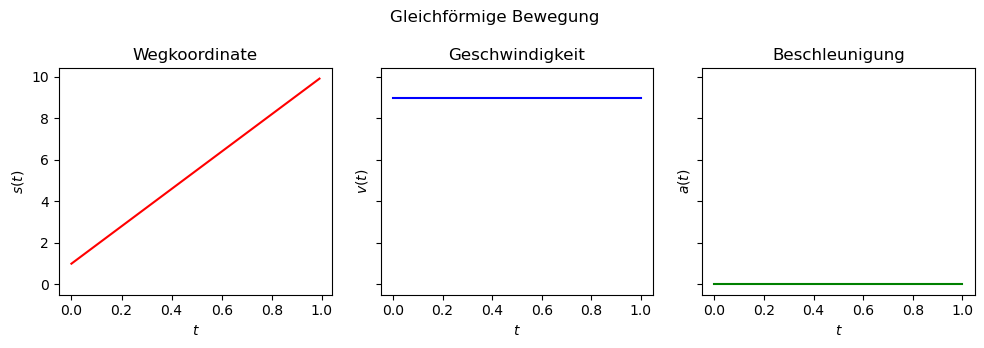

In [6]:
# define the time dependence of the distance travelled as a function
f_as = lambda t: 0*t

# compute the distance travelled (along the trajectory) for each time point
a_s = f_as(t)

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,3.5),sharey=True)

# plot s-t-diagram
axes[0].plot(t,s,color="red")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$s(t)$")
axes[0].set_title("Wegkoordinate")

# plot v-t-diagram
axes[1].plot([0,t_max],[v,v],color="blue",label="$v(t)$")
axes[1].set_xlabel("$t$")
axes[1].set_ylabel("$v(t)$")
axes[1].set_title("Geschwindigkeit")

# plot a-t-diagram
axes[2].plot([0,t_max],[0,0],color="green",label="$v(t)$")
axes[2].set_xlabel("$t$")
axes[2].set_ylabel("$a(t)$")
axes[2].set_title("Beschleunigung")

#plt.tight_layout()
plt.suptitle("Gleichförmige Bewegung")
plt.tight_layout()
plt.show()